In [56]:
from tensorflow.keras import layers, models, optimizers

hybrid_model = models.Sequential()

hybrid_model.add(layers.Input(shape=(28, 28, 1)))
hybrid_model.add(layers.Conv2D(32, (3, 3), padding='same'))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))

hybrid_model.add(layers.Conv2D(64, (3, 3)))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Conv2D(32, (3, 3), padding='same'))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Reshape(target_shape=(-1, 64)))

hybrid_model.add(layers.LSTM(128, return_sequences=True))
#hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.LSTM(64, return_sequences=False))
#hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Dense(256))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.Dropout(0.5))

hybrid_model.add(layers.Dense(47, activation='softmax'))

hybrid_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


Batch images shape: (128, 28, 28, 1)
Batch labels shape: (128, 47)


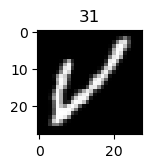

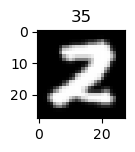

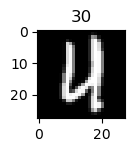

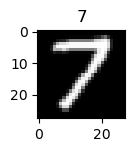

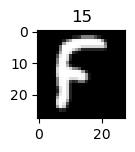

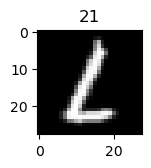

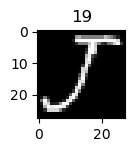

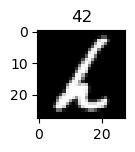

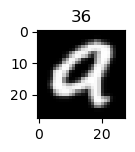

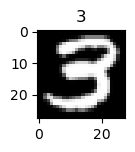

In [57]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
def preprocess(image, label):
    image = tf.transpose(image)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, (28, 28, 1))
    label = tf.one_hot(label, depth=47)
    return image, label
ds_train = ds_train.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
for images, labels in ds_train.take(1):
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
#print the images

import matplotlib.pyplot as plt

for image,label in ds_train.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().squeeze(),cmap='gray')
        plt.title(np.argmax(label[i],axis=0))
        plt.tight_layout()
        plt.show()


In [ ]:
hybrid_model.fit(ds_train,epochs=15,batch_size=64,validation_data=ds_test)

Epoch 1/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 70s 76ms/step - accuracy: 0.5688 - loss: 1.4144 - val_accuracy: 0.8051 - val_loss: 0.5968
Epoch 2/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 69s 78ms/step - accuracy: 0.8296 - loss: 0.5118 - val_accuracy: 0.8550 - val_loss: 0.4273
Epoch 3/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 71s 81ms/step - accuracy: 0.8580 - loss: 0.4081 - val_accuracy: 0.8522 - val_loss: 0.4322
Epoch 4/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 70s 80ms/step - accuracy: 0.8721 - loss: 0.3619 - val_accuracy: 0.8587 - val_loss: 0.4094
Epoch 5/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 70s 79ms/step - accuracy: 0.8814 - loss: 0.3301 - val_accuracy: 0.8706 - val_loss: 0.3746
Epoch 6/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 71s 80ms/step - accuracy: 0.8867 - loss: 0.3105 - val_accuracy: 0.8784 - val_loss: 0.3580
Epoch 7/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 68s 77ms/step - accuracy: 0.8923 - loss: 0.2909 - val_accuracy: 0.8762 - val_loss: 0.3612
Epoch 8/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 70s 79ms/step - accuracy: 0.8963 - loss: 0.2781 - 

In [59]:
hybrid_model.evaluate(ds_test)

147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8771 - loss: 0.4066


[0.406593918800354, 0.8771276473999023]